In [1]:
from examtoolbox import *

# Variance Models

In [2]:
n_experiments = 100
n_trials = 50
mu_s = 1
mu_s0 = 0
sigma_s = 1
sigma_s0 = 1
equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, sigma_s, sigma_s0)
un_equl_var = Variance_Model(n_experiments, n_trials, mu_s, mu_s0, 0.8, sigma_s0)

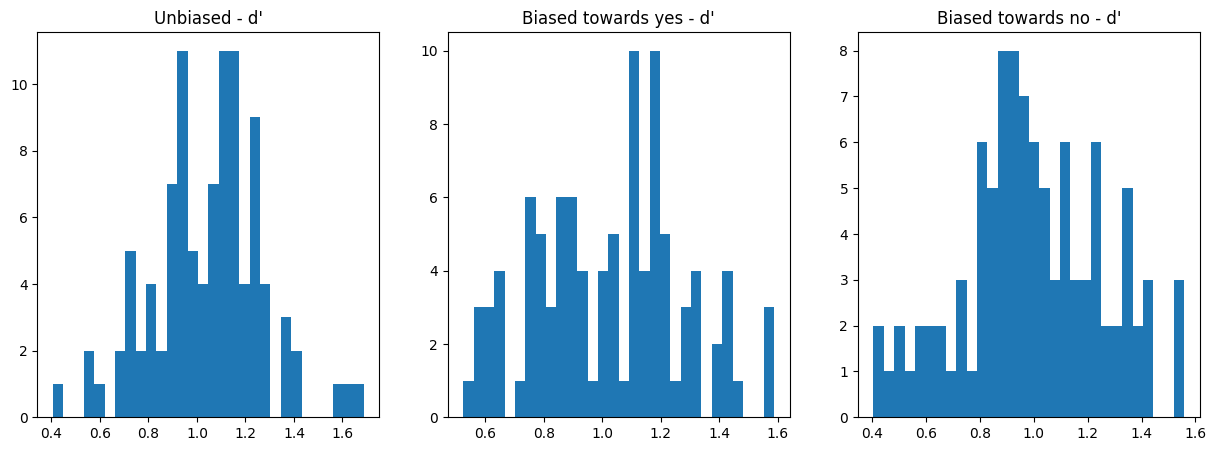

The d prime for the unbiased criterion: 1.0456080536266859
The d prime for the biased towards yes criterion: 1.023983723608489
The d prime for the biased towards no criterion: 0.9973101005487378


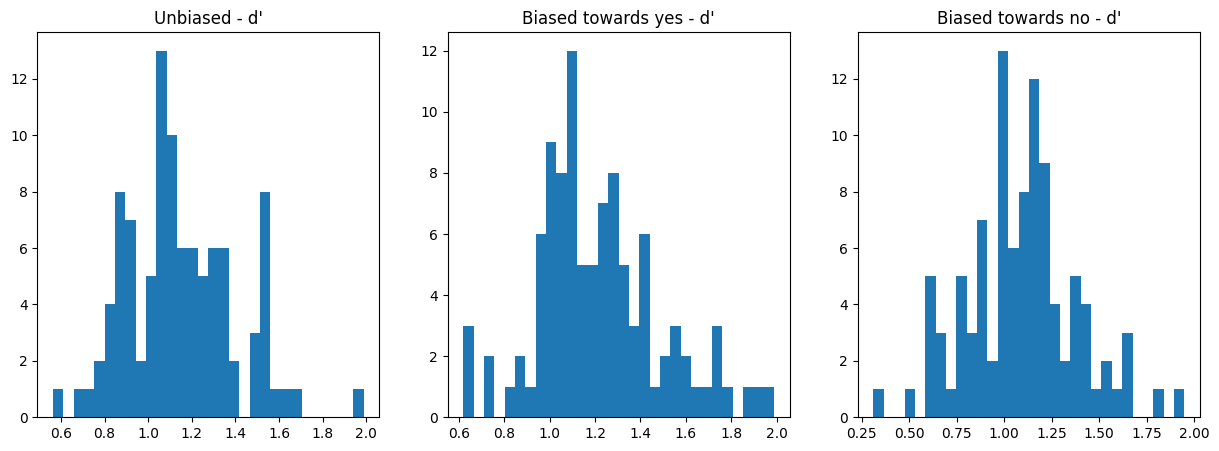

The d prime for the unbiased criterion: 1.1481840210730707
The d prime for the biased towards yes criterion: 1.2159834919664745
The d prime for the biased towards no criterion: 1.0895113329174029


In [3]:
cs = [0.5, 0.3, 0.7]
equl_var.plot_histogram(cs)
un_equl_var.plot_histogram(cs)

## Unequal variances with multiple criterions

In [1]:
cs = [0.2, 0.5, 0.8]
model = Variance_Model_2(100, 50, 1, cs)

NameError: name 'Variance_Model_2' is not defined

/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


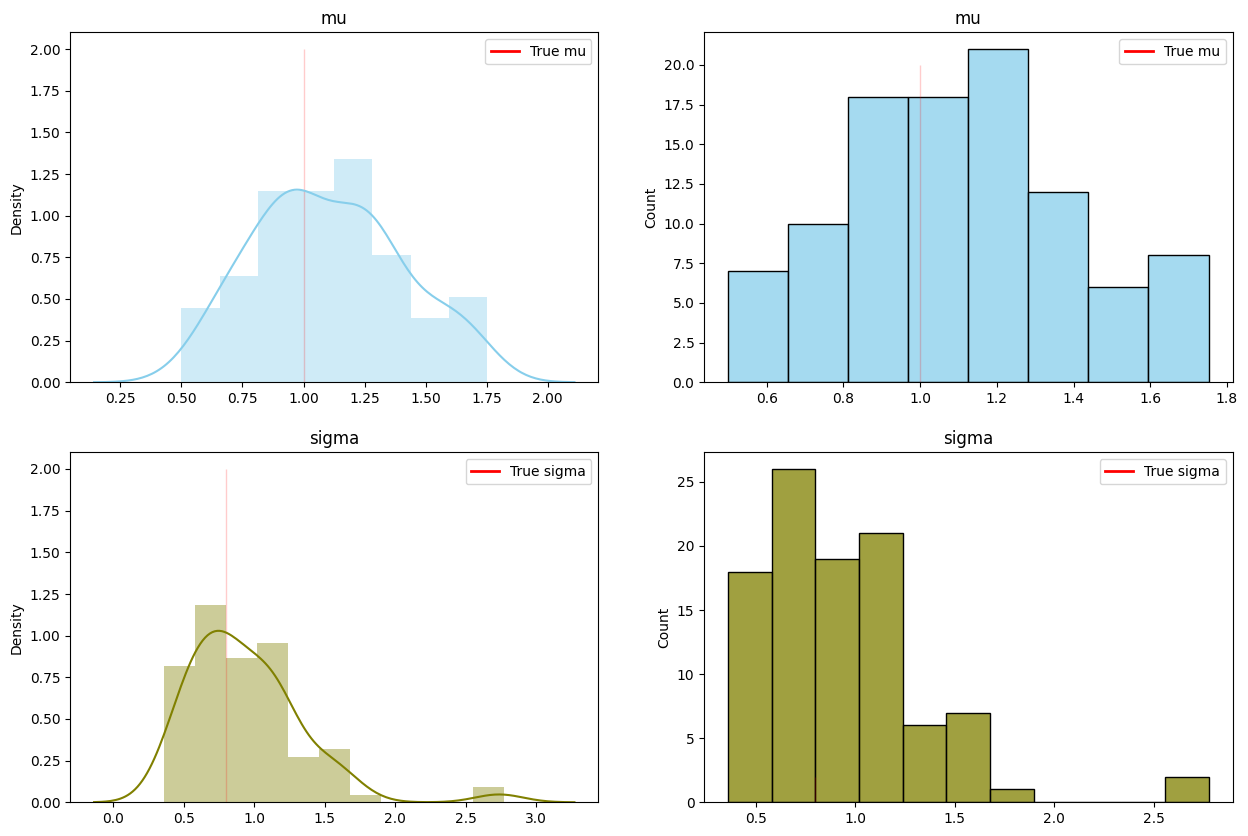

In [5]:
model.plot_histogram()

# Psychometric functions

In [12]:
number_of_trials = 30
stimulus_intensity = np.array([5, 10, 15, 20, 25, 30])
number_of_correct_responses = np.array([12, 11, 19, 27, 30, 30])

# Create a new model
model = PsychoMetric(stimulus_intensity, number_of_correct_responses, number_of_trials, p_guess=1/3)

In [13]:
model.print_parameters([15, 5], "psycho")
model.print_parameters([15, 5], "HT")

c =  10.131849003731983
sigma =  8.190826475506526
Negative log likelihood =  11.315347372636985
c =  15.692027691293188
sigma =  3.7780834209478726
Negative log likelihood =  7.637350852186732


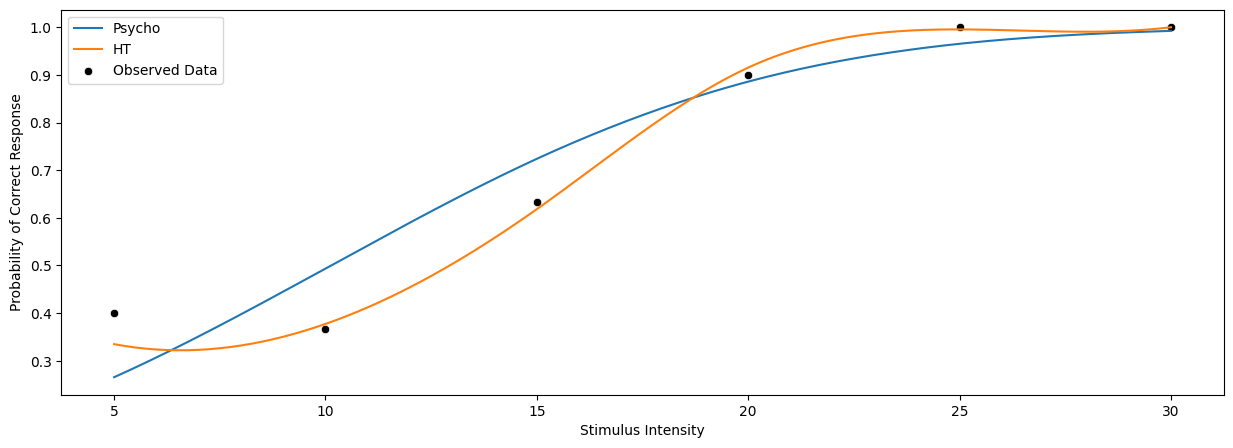

In [14]:
model.plot_psycho([15, 5])

# Magnitude Estimation

Optimal Weber fraction 0.19980887890008203
I0: 0.15559519612133466


/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:267: RuntimeWarning: invalid value encountered in log
  return (1/c)*np.log(i_s/I0)


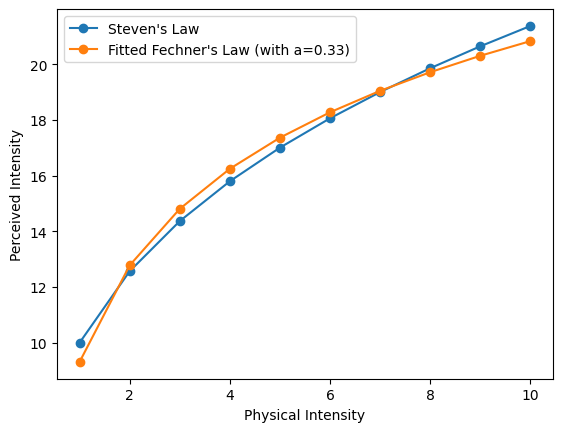

In [9]:
model = MagnitudeEsimation(10, 0.33)
model.print_fit()

Optimal Weber fraction 0.00013132317238284192
I0: 2.0418488472369387


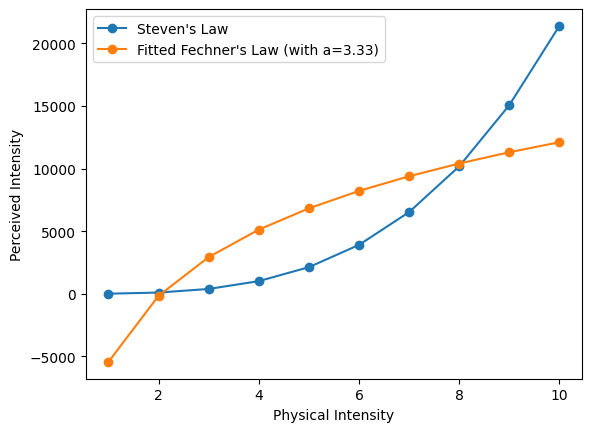

In [10]:
model = MagnitudeEsimation(10, 3.33)
model.print_fit()

# PCA Images

images/0_23_0_0_20170117144406947.jpg.chip.jpg
images/0_23_0_1_20170113133833362.jpg.chip.jpg
images/0_23_0_0_20170117144706803.jpg.chip.jpg
images/0_23_0_0_20170117144642723.jpg.chip.jpg


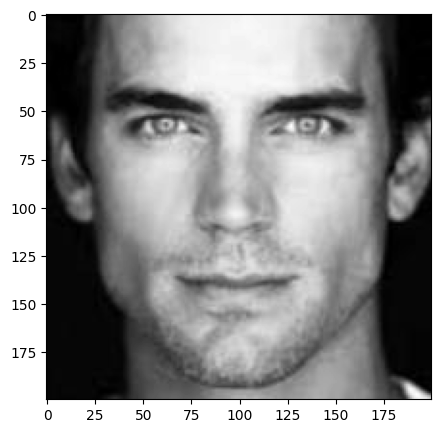

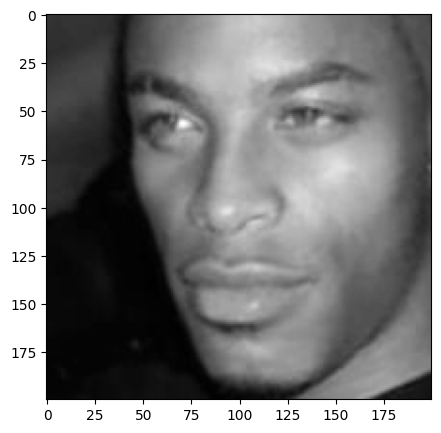

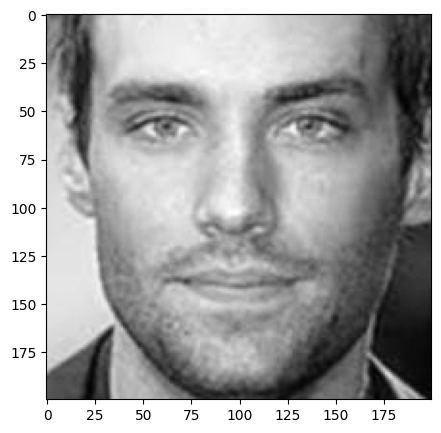

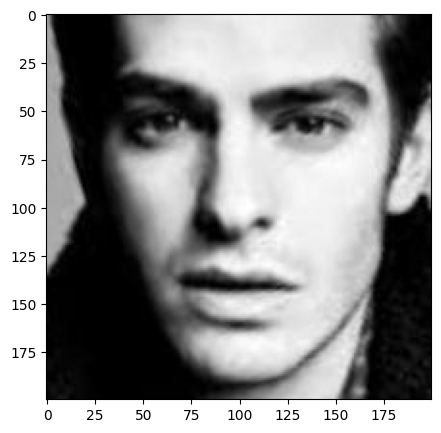

In [11]:
model = PCA_Images("images/")
images = model.load_images()
#model.plot_images(images)

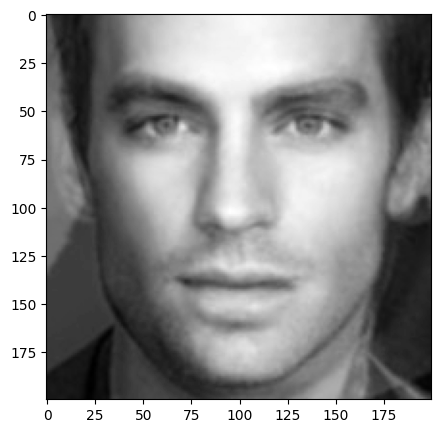

In [12]:
mean_image = model.get_mean_image(images, show=True)

(4, 40000)
The first 4 components return 0.9999999999999999 of variance


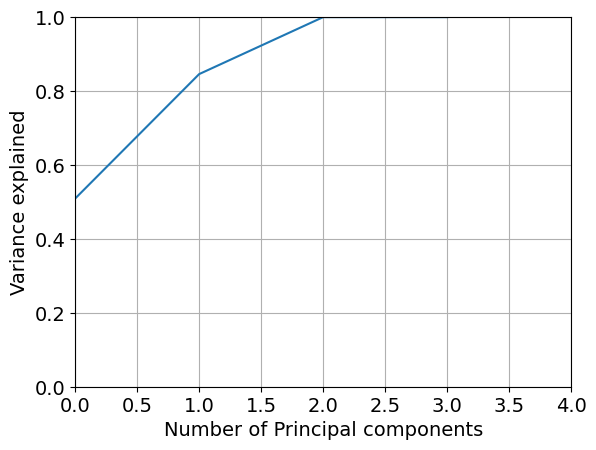

In [13]:
pca, pc_scores = model.pca(images, 4)
model.explained_variance(pca)

images/0_23_0_0_20170117144406947.jpg.chip.jpg
images/0_23_0_1_20170113133833362.jpg.chip.jpg
images/0_23_0_0_20170117144706803.jpg.chip.jpg
images/0_23_0_0_20170117144642723.jpg.chip.jpg


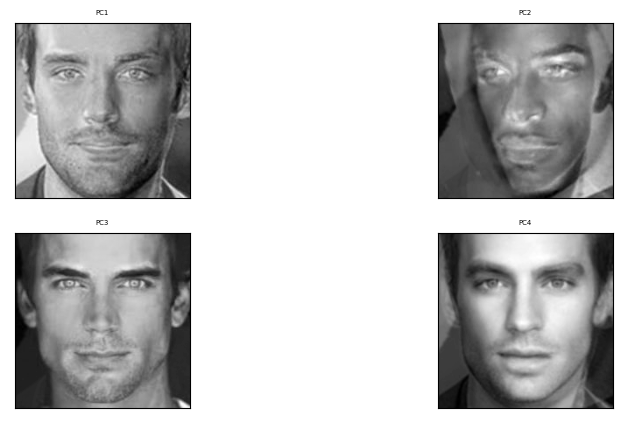

In [14]:
model.plot_pc(pca, pc_scores)

# BCI

In [2]:
import pandas as pd
data = pd.read_csv("test_data/Homework3pt2DataCSV1.txt", header = None, sep= "\s+")

In [3]:
model = BCI(n_responses=24, data=data)

In [4]:
model.print_parameters(model='Early')
model.print_parameters(model='Strong Fusion')
model.print_parameters(model='Late')

/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWa

Printing parameters for Early Fusion Model
c_a:  3.1793682218281725
c_v:  1.8609707378177893
sigma_a:  0.6834998508504876
sigma_v:  0.43302737402663627
c:  0.7211211218736034
Negative Loglikelihood Value: 56.38643953061671
Printing parameters for Strong Fusion Model
P_a1: 0.035144857277498956
P_a2: 0.09161573391649973
P_a3: 0.17965109927640371
P_a4: 0.9210526566382098
P_a5: 0.9613754710175443
P_v1: 0.04861529416478027
P_v2: 0.6986231559904882
P_v3: 0.9482924048357919
P_v4: 0.972973803756389
P_v5: 0.9786687595944064
c: 0.9999999645798611
Negative Loglikelihood Value: 47.34162635779953


/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:642: RuntimeWarning: divide by zero encountered in log
  L.append(np.log(stats.binom.pmf(self.x_av.iloc[i,j], self.n_responses, P_av_BCI[i,j])))
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:644: RuntimeWarning: divide by zero encountered in log
  nll = -sum(np.log(stats.binom.pmf(self.x_a, self.n_responses, Pa))) - sum(np.log(stats.binom.pmf(self.x_v, self.n_responses, Pv))) - sum(L)
/opt/homebrew/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/gustavlarsen/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Uni/Cognitive Modelling/02458_Cognitive_Modelling/Exam/examtoolbox.py:642: RuntimeWarning: divide by zero encountered in log
  L.append(

Printing parameters for Late Fusion Model
c_a:  3.119453243580061
c_v:  1.9022332598222562
sigma_a:  1.0005285004789424
sigma_v:  0.4790412508216007
c:  0.7123217285282156
Negative Loglikelihood Value: 69.11223620911568


# MLE

In [5]:
model = MLE(n_responses=24, data=data)
model.print_parameters(model='Early')
model.print_parameters(model='Fuzzy')
model.print_parameters(model='Late')

Printing parameters for Early Fusion Model
c_a:  3.311691993714958
c_v:  1.8576907134328449
sigma_a:  0.9029544131700642
sigma_v:  0.8752333962861127
Negative Loglikelihood Value: 72.80160664670224
Printing parameters for Fuzzy Model
P_a1: 0.22754579826525617
P_a2: 0.38670701327867646
P_a3: 0.5138876892221261
P_a4: 0.9572476431303544
P_a5: 0.9781424205227653
P_v1: 0.03019448769103092
P_v2: 0.4187351130863968
P_v3: 0.5578201152460507
P_v4: 0.7347719407751798
P_v5: 0.8220089266351588
Negative Loglikelihood Value: 108.1467292572274
Printing parameters for Late Fusion Model
c_a:  3.2269959580645824
c_v:  1.9353987000373456
sigma_a:  1.3406117782890439
sigma_v:  1.3344489206689862
Negative Loglikelihood Value: 95.30782910293735


# ROC

In [3]:
import numpy as np
n_trials = 50
TP = np.array([49, 44, 34, 21, 11])
FN = n_trials - TP
FP = np.array([37, 33, 13, 7, 1])
TN = n_trials - FP

model = ROC(TP, FP, TN, FN)

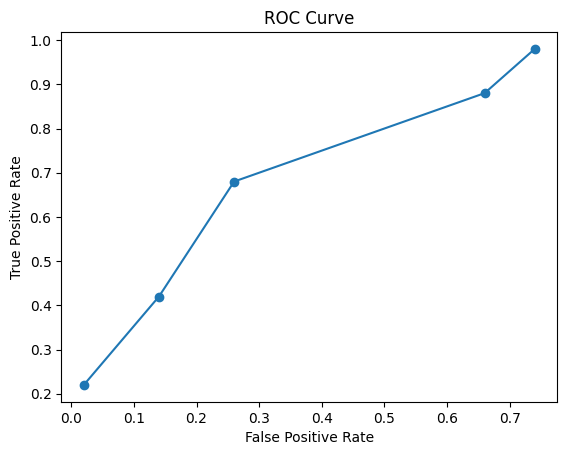

In [8]:
model.plot_ROC()

In [21]:
psycho = PsychoMetric(np.array([1,2,3,4,5]), np.array([11, 21, 34, 44, 49]), 50, p_guess=1/2)

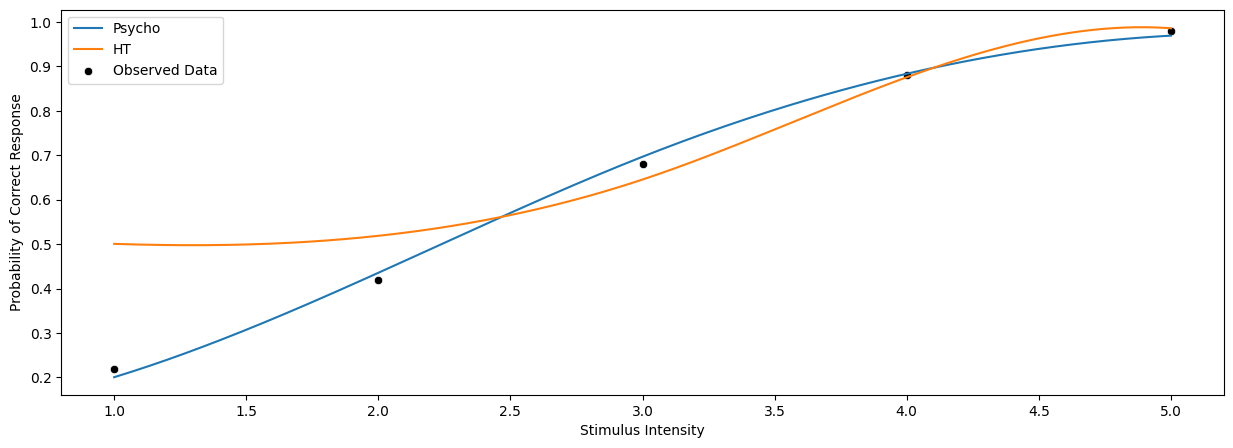

In [24]:
psycho.plot_psycho([3, 1])

In [29]:
n_trials = 50
#rebin 2-5
tp = 4
fp = 46
fn = 2
tn = 48

norm.ppf(tp/n_trials)-norm.ppf(fp/n_trials)

-2.8101431206192657

In [31]:
#rebin 1-4
tp = 48
fp = 2
fn = 24
tn = 26

norm.ppf(tp/n_trials)-norm.ppf(fp/n_trials)

3.501372142504339